In [361]:
# https://youtu.be/P4OevrwTq78

In [362]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense,Dropout,Flatten, Conv2D,MaxPooling2D, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras import layers, initializers, regularizers, optimizers, metrics 

import os
import time
import random 
import zipfile
import glob
from shutil import copyfile

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px
from matplotlib.colors import ListedColormap
from matplotlib.ticker import StrMethodFormatter

from sklearn.metrics import confusion_matrix
import itertools 

#from tensorflow.keras import tensorboard

## Constants

In [363]:
global_seed=1234

## Source data

#### Settings

In [364]:
best_model = "C:\\Users\\pedro.assis\\Downloads\\4cnn_2fc_dropout_35_l2_sgd_008_150epochs_4.h5"

#best_model = "C:\\Users\\pedro.assis\\Downloads\\model (1).h5"

In [365]:
#definitions

import_files_from_google_colab = False

root_path = "input/"
main_folder_name, training_folder_name, testing_folder_name = "images/", "train/", "validation/"

images_size = 48


#### Import files

In [366]:
# importing files from google colab if needed
if import_files_from_google_colab:
    # from google.colab import drive
    drive.mount('/content/drive')
    # Set connection string
    path = "/content/drive/MyDrive/"
    # Measure time
    t0 = time.time()
    # Transfer zip dataset to the current virtual machine
    copyfile(path + 'Faces.zip', 'Faces.zip')
    # Extract files
    zip_file = zipfile.ZipFile('Faces.zip')
    zip_file.extractall()
    zip_file.close()
    print("File transfer completed in %0.3f seconds" % (time.time() - t0))
    root_path = "/content/"

In [367]:
base_path = root_path + main_folder_name
training_folder = base_path + training_folder_name
testing_folder = base_path + testing_folder_name

In [368]:
color_mode='grayscale'
batch_size=32
crop_to_aspect_ratio=True
label_mode='categorical'
shuffle=True


In [369]:
ds_train = image_dataset_from_directory(training_folder, 
                                        image_size=(images_size, images_size),
                                        crop_to_aspect_ratio=crop_to_aspect_ratio,
                                        color_mode=color_mode,
                                        batch_size=batch_size,
                                        label_mode=label_mode,
                                        shuffle=shuffle,
                                        seed=global_seed)

# Create test dataset (no need to split)
ds_test = image_dataset_from_directory(testing_folder, 
                                       image_size=(images_size, images_size),
                                       crop_to_aspect_ratio=crop_to_aspect_ratio,
                                       color_mode=color_mode,
                                       batch_size=batch_size,
                                       label_mode=label_mode,                                     
                                       shuffle=shuffle,
                                       seed=global_seed)

Found 28821 files belonging to 7 classes.
Found 7066 files belonging to 7 classes.


In [370]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

## Final Model Testing

In [371]:
ds_test.file_paths

['input/images/validation/fear\\25061.jpg',
 'input/images/validation/happy\\14973.jpg',
 'input/images/validation/surprise\\29690.jpg',
 'input/images/validation/happy\\25472.jpg',
 'input/images/validation/sad\\6459.jpg',
 'input/images/validation/fear\\27300.jpg',
 'input/images/validation/sad\\12659.jpg',
 'input/images/validation/surprise\\35608.jpg',
 'input/images/validation/fear\\19252.jpg',
 'input/images/validation/angry\\26620.jpg',
 'input/images/validation/fear\\1401.jpg',
 'input/images/validation/happy\\613.jpg',
 'input/images/validation/neutral\\20150.jpg',
 'input/images/validation/angry\\14945.jpg',
 'input/images/validation/surprise\\34087.jpg',
 'input/images/validation/fear\\1657.jpg',
 'input/images/validation/sad\\34387.jpg',
 'input/images/validation/angry\\10554.jpg',
 'input/images/validation/sad\\5435.jpg',
 'input/images/validation/angry\\21541.jpg',
 'input/images/validation/happy\\28376.jpg',
 'input/images/validation/angry\\26185.jpg',
 'input/images/val

In [372]:

model = load_model(best_model)

In [373]:
y_real =  np.array([])
predictions = np.array([])
for x, y in ds_test:
  y_real = np.concatenate([y_real, np.argmax(y.numpy(), axis=-1)])
  predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis = -1)])
  #print(x)
  #print(np.divide(x,255))
  #print(y_real)
  #print(predictions)


1/1 [==============================] - 1s 571ms/step


In [374]:
results = model.evaluate(ds_test)
print('The current model achieved a categorical accuracy of {}%!'.format(round(results[1]*100,2)))

221/221 [==============================] - 38s 167ms/step - loss: 1.2911 - Accuracy: 0.6073 - AUROC: 0.9068
The current model achieved a categorical accuracy of 60.73%!


In [375]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

<Figure size 640x480 with 0 Axes>

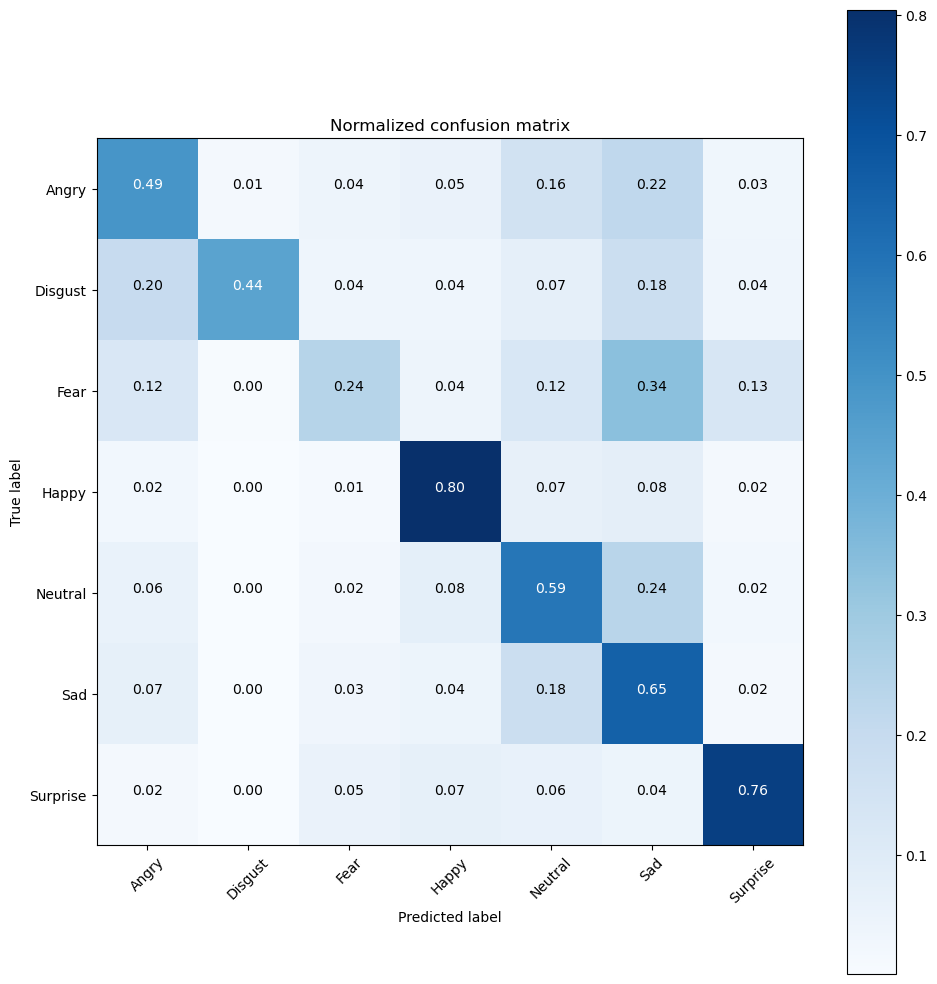

In [376]:
# compute confusion matrix
cnf_matrix = confusion_matrix(y_real, predictions)
np.set_printoptions(precision=2)
# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_labels, title='Normalized confusion matrix')
plt.show()